# 10.3. Empirical Distribution of a Statistic

- The **Law of Averages** implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

In [3]:
from datascience import *
path_data = '../../data/'

united = Table.read_table(path_data + 'united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


Text(0.5, 1.0, 'Population')

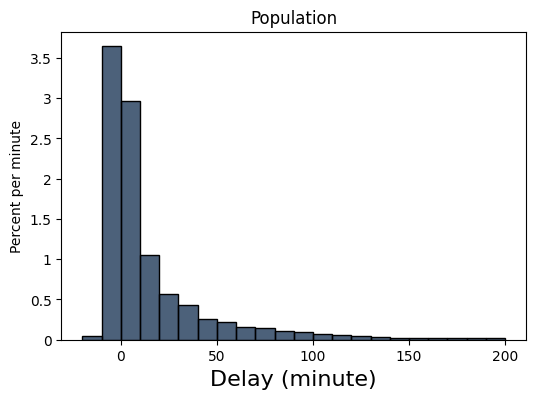

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %%matplotlib

##### we remember that 200 is a good stop
delay_bins = np.arange(-20, 201, 10)

##### let's do a histogram of the population
united.hist('Delay', bins= delay_bins, unit = 'minute')
plt.title('Population')

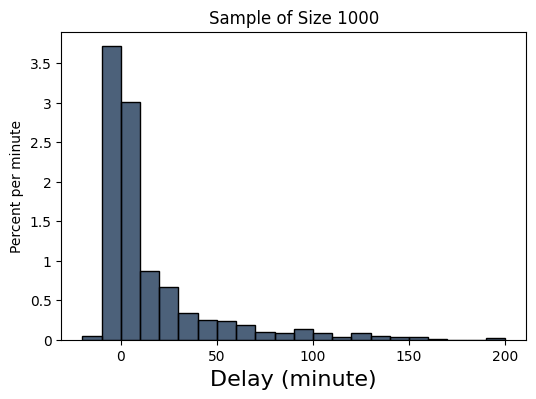

In [23]:
##### sample from population 1000 times

sample_1000 = united.sample(1000) 
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plt.title('Sample of Size 1000');

In [16]:
##### population and sample resemble but not identical

## 10.3.1. Parameter

- Numerical quantities associated with a population are called **parameters**.
- e.g., "median delay" (median (half-way point) of an array)

In [26]:
np.median(united.column('Delay'))

2.0

In [27]:
# united.where('Delay', are.below_or_equal_to(2))
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

In [28]:
united.where('Delay', are.equal_to(2)).num_rows

480

## 10.3.2. Statistic

- A **statistic** (note the singular!) is any number computed using the data in a sample

In [20]:
sample_1000     ##### = united.sample(1000) 

Date,Flight Number,Destination,Delay
7/15/15,1124,SEA,13
8/14/15,1118,EWR,7
7/25/15,824,JFK,2
8/30/15,1120,BOS,-1
7/5/15,1914,IAH,1
6/13/15,1686,DCA,-5
8/30/15,237,STL,16
7/30/15,1710,LAX,5
8/19/15,1907,EWR,-2
6/13/15,1122,HNL,51


In [30]:
np.median(sample_1000.column('Delay'))

##### The statistic could have been different.

2.0

In [31]:
##### let's resample
np.median(united.sample(1000).column('Delay'))

2.0

## 10.3.3. Simulating a Statistic

1. Step 1: Decide which statistic to simulate.
2. Step 2: Define a function that returns one simulated value of the statistic.
3. Step 3: Decide how many simulated values to generate.
4. Step 4: Use a for loop to generate an array of simulated values. 

In [32]:
##### Draw a random sample of size 1000 and compute the median of the sample. 
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

In [33]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

## 10.3.4. Visualization

In [34]:
simulated_medians = Table().with_column('Sample Mdeian', medians)
simulated_medians

Sample Mdeian
2
2
3
2
2
3
2
2
2
3


#### visualize the simulated data using a histogram

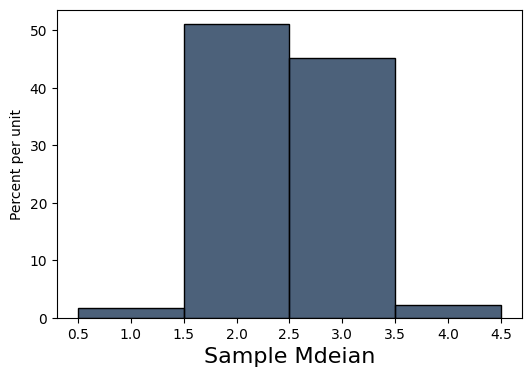

In [35]:
simulated_medians.hist(bins = np.arange(0.5, 5, 1))

## statistic can provide a good estimate of a parameter

## 10.3.5. The Power of Simulation

-  the number of all possible samples is large enough to exceed the capacity of the computer, and
-  purely mathematical calculations of the probabilities can be intractably difficult.

==> empirical histograms

### simulating random processes repeatedly is a way of approximating probability distributions without figuring out the probabilities mathematically or generating all possible random samples. 